<a href="https://colab.research.google.com/github/gavindoughtie/pytorch_class/blob/main/udemy_pytorch_02_03_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow


Let's explort an example PyTorch end-to-end workflow

Resources:

* Gradient Descent - https://youtu.be/IHZwWFHWa-w
* Backpropagation - https://youtu.be/Ilg3gGewQ5U
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
what_were_covering = {1: 'data (prepare and load', 2: 'build model', 3: 'fitting the model to the data (training)',
                      4: 'making predictions and evaluating a model (inference)', 5: 'saving and loading a model', 6: 'putting it all together'}

In [ ]:
what_were_covering

{1: 'data (prepare and load',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0+cu116'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

The formula for simple linear regression is Y = mX + b, where Y is the response (dependent) variable, X is the predictor (independent) variable, m is the estimated slope, and b is the estimated intercept.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

* training set (train the model)
  a. 60-80% of data
* validation set (tune the model)
  a. 10% but not always
* test set (make sure the model has generalized)

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
# scikit learn has a util for splitting
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's mootto comes in.

"Visualize visualize visualize!"

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, 
              train_labels, 
              c="b", 
              s=4, 
              label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data,
              test_labels,
              c="g",
              s=4,
              label="Testing data")
  
  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,
                predictions,
                c="r",
                s=4,
                label="Predictions")
    
  # Show the legend
  plt.legend(prop={"size": 14})


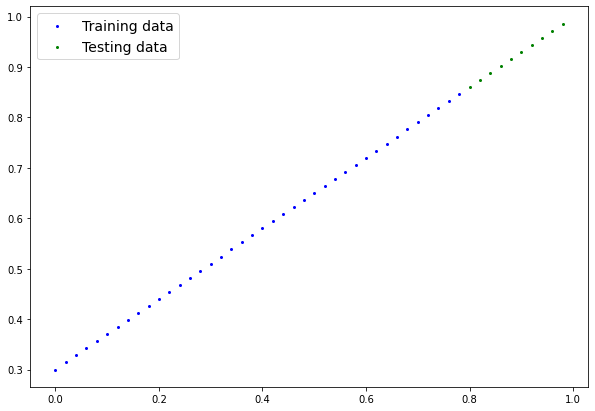

In [ ]:
plot_predictions()

from torch._C import PyTorchFileReader
## 2. Building our first model

Our first PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent the ideal values (the weight and bias values we used to create the data)

How?

Through two main algorithms:

1. Gradient descent
2. Backpropagation

In [ ]:
# Create a linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
        torch.randn(
            1,
            requires_grad=True, # default
            dtype=torch.float)) # default

    self.bias = nn.Parameter(
        torch.randn(
            1, 
            requires_grad=True,
            dtype=torch.float))
  
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- x is the input data
    return self.weights * x + self.bias # linear regression formula
  

### PyTorch model building essentials

See [The PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

* torch.nn - contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try to learn; often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules; full of useful stuff. If you subclass it you must override `forward`.
* torch.optim - this is where the optimizers live. They will help with gradient descent.
* `def forward()` - All nn.Module subclasses require you to override forward. Defines what happens in the forward computation.
* torch.utils.Dataset - Represents a map between key (label) and sample (features) pairs of your data such as images and their associated labels.
* torch.utils.data.DataLoader - Creates a Python iterable over a torch Dataset (allows you to iterate over your data).

### Checking the contents of the PyTorch model

Now that we've created the model, what's inside?

We can check out our model parameters using `.parameters()`.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (a subclass of nn.Module)

model_0 = LinearRegressionModel()

# check out the parameters.
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
# basic predctions:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode(): # turns off gradient tracking (faster), which we don't need for inferencing
  y_preds = model_0(X_test)

with torch.no_grad(): # also turns off gradient tracking, but prefer with inference_mode()
  y_preds_no_grad = model_0(X_test)

# if the model works, it should make these sets the same:
# y_preds, y_test

y_preds, y_preds_no_grad

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]), tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

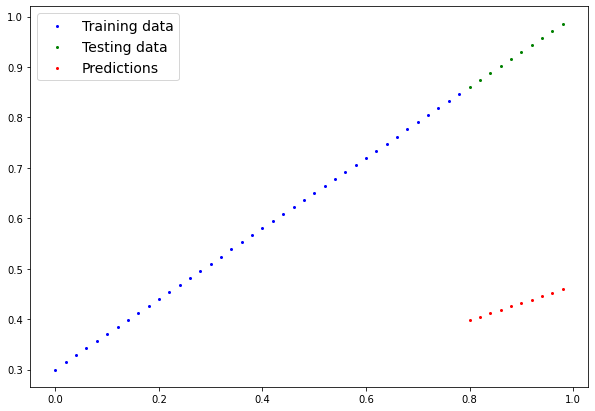

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to known parameters.and

Or in other words, from a poor representation of the data to a better representation of the data.

One way to measure how wrong the predictions are, is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs. Lower is better. 
* https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case) to improve the loss function.
* https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
# list(model_0.parameters()) OR
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
MAE_loss = torch.abs(torch.abs(y_preds - y_test))
#MAE_loss2 = model_0.L1Loss()

#MAE_loss, MAE_loss2

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01) # lr = learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass to make predictions (this involves data moving through our model's `forward()` function - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss  (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)


In [ ]:
# An epoch is one loop through the data...
epochs = 200 # a hyperparameter because we set it ourselves
torch.manual_seed(42)

# track values for tuning models later
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  # train mode in PyTorch sets all parameters that require gradients 
  # to require gradients
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()
  # by default how the optimizer changes will accumulate through the loop so
  # we have to zero them above in step 3 for the next iteration of the loop.

  model_0.eval()  # turns off things like dropout; not needed for eval
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
    print(f"{model_0.state_dict()}\nshould be getting close to\n{weight, bias}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
should be getting close to
(0.7, 0.3)
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
should be getting close to
(0.7, 0.3)
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
should be getting close to
(0.7, 0.3)
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
should be getting close to
(0.7, 0.3)
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
should be getting close to
(0.7, 0.3)
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weight

- *Learning rate scheduling*: reducing size of steps while performing gradient descent
- *Convergence*: Bottom of the gradient curve

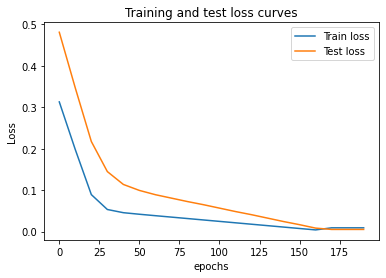

In [ ]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()

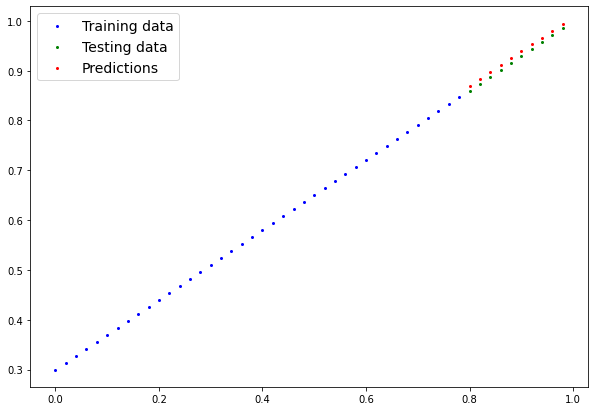

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` - Load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary.

Typically you just save the state_dict which saves the learned parameters but you can also save the entire model. https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving our PyTorch model
from pathlib import Path
from google.colab import drive
import shutil
from torch import nn

def save_model(model: nn.Module, name: str, save_to_drive=True):
  # 1. Create models directory
  MODEL_PATH = Path('models')
  MODEL_PATH.mkdir(parents=True, exist_ok=True)

  # 2. Create a model save path
  model_save_path = MODEL_PATH / name

  DRIVE_PATH = Path('/content/drive')
  DRIVE_MODELS_PATH = DRIVE_PATH / Path('MyDrive/pytorch_models/')

  print(f'Saving model to {model_save_path}')

  torch.save(obj=model.state_dict(), f=model_save_path)

  if save_to_drive:
    shutil.copy(model_save_path, DRIVE_MODELS_PATH)
  #cmd = f'cp {MODEL_SAVE_PATH} {DRIVE_MODELS_PATH}'
  #!{cmd}
  print(f'saved to {DRIVE_MODELS_PATH / name}')
  return (model_save_path)

In [ ]:
# Loading our model

# Save the model:
(model_save_path) = save_model(model_0, '01_model_0.pth')

# Instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=model_save_path))


Saving model to models/01_model_0.pth
saved to /content/drive/MyDrive/pytorch_models/01_model_0.pth


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# make some predictions with the loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# get some preds from the original model:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

# compare loaded model preds with original model preds
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [ ]:
# Import PyTorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__


'1.13.0+cu116'

Create device-agnostic code.

This means if we've got access to a GPU our code will use it, otherwise the code will default to using CPU.

In [ ]:
# Setup device-agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


## 6.1 Data



In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias

# using different values from first example
weight = 0.8
bias = 0.2

start = 0
end = 1

step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight = X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

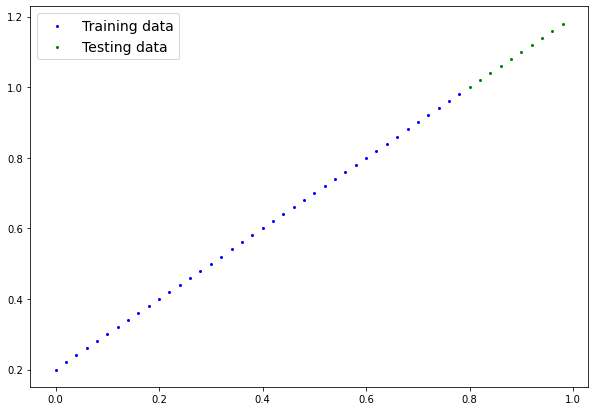

In [ ]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
torch.randn(1)

tensor([0.2345])

f## 6.2 Building a PyTorch Linear Model

In [ ]:
import torch
from torch import nn

class MyLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # could do init this way:
    # self.m = nn.Parameter(torch.randn(1))
    # self.bias = nn.Parameter(torch.randn(1))
    # use nn.Linear() instead of creating parameters ourselves.
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # old:
    # return self.m * x + self.bias
    # new, using the layer:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = MyLinearRegressionModel()
model_1.state_dict(), list(model_1.parameters())

(OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 [Parameter containing:
  tensor([[0.7645]], requires_grad=True), Parameter containing:
  tensor([0.8300], requires_grad=True)])

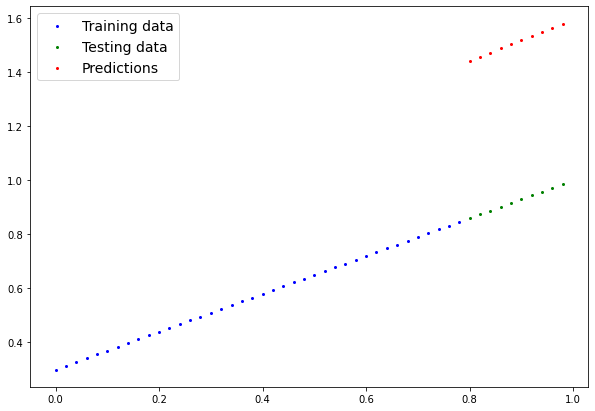

In [ ]:
with torch.inference_mode():
  y_preds1 = model_1(X_test)
plot_predictions(predictions=y_preds1)

In [ ]:
# Set the model to use the target device
initial_device = next(model_1.parameters()).device
model_1.to(device) # set to current device
current_device = next(model_1.parameters()).device
initial_device, current_device


(device(type='cpu'), device(type='cuda', index=0))

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # Same as MAE

# setup out optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# Training loop
epochs = 90
torch.manual_seed(42)

# put all tensors on the target device:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train() # set to training mode

  # Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print what's happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} loss: {loss} Test loss {test_loss}')

model_1.state_dict()

Epoch: 0 loss: 0.5381779670715332 Test loss 0.40697622299194336
Epoch: 10 loss: 0.4229681193828583 Test loss 0.2722663879394531
Epoch: 20 loss: 0.3077581822872162 Test loss 0.13755656778812408
Epoch: 30 loss: 0.19254833459854126 Test loss 0.017818046733736992
Epoch: 40 loss: 0.1043078675866127 Test loss 0.10629735141992569
Epoch: 50 loss: 0.08409178256988525 Test loss 0.14757494628429413
Epoch: 60 loss: 0.07735064625740051 Test loss 0.16171959042549133
Epoch: 70 loss: 0.07324770838022232 Test loss 0.16313493251800537
Epoch: 80 loss: 0.06971960514783859 Test loss 0.15898369252681732


OrderedDict([('linear_layer.weight', tensor([[0.6707]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3385], device='cuda:0'))])

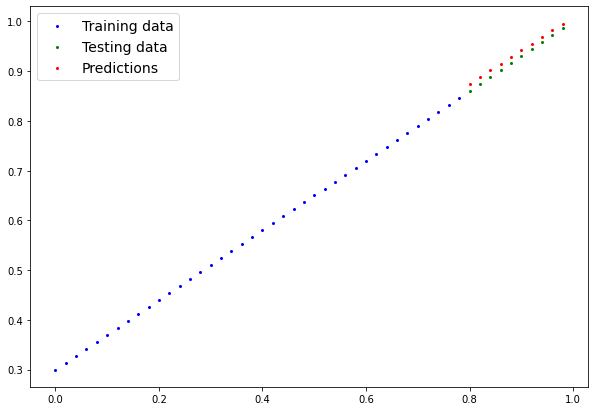

In [ ]:
with torch.inference_mode():
  y_preds1 = model_1(X_test)
plot_predictions(predictions=y_preds1.cpu())

# 6.5 Save and load the model

In [ ]:
(saved_model_path) = save_model(model_1, 'my_model.pth')
saved_model_path

Saving model to models/my_model.pth
saved to /content/drive/MyDrive/pytorch_models/my_model.pth


PosixPath('models/my_model.pth')

In [ ]:
model_2 = MyLinearRegressionModel()
model_2.load_state_dict(torch.load(f=saved_model_path))
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6707]])),
             ('linear_layer.bias', tensor([0.3385]))])

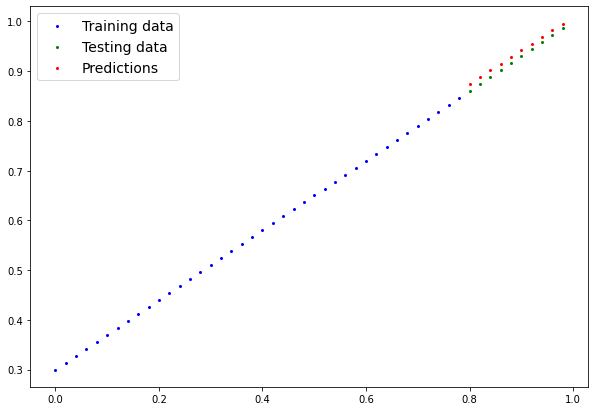

In [ ]:
model_2.to(device)
with torch.inference_mode():
  y_preds2 = model_2(X_test)
plot_predictions(predictions=y_preds2.cpu())

## Exercises and Extra-curriculum

Look in the book, etc.

Do the exercises.
